# Detection of ArUco Markers

## 1. Generating ArUco Markers

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from skimage import io
from PIL import Image
from scripts.cv2_imshow import cv2_imshow

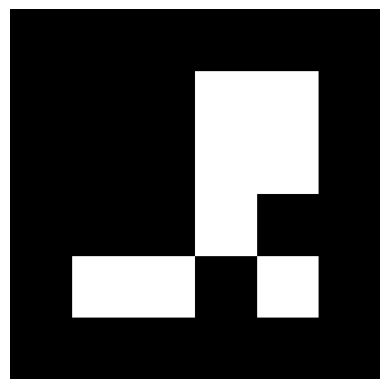

In [19]:
myDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)

def generate_aruco(id, dictionary=cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50), size=500, filename='aruco.png'):
    # Generate the marker image
    img = cv2.aruco.generateImageMarker(dictionary, id, size)
    cv2.imwrite(f'img/{filename}', img)
    return img

# Generate ArUco tag with id 5
tag_1 = generate_aruco(2, dictionary=myDict, filename='aruco_2.png')

# Display the image
cv2_imshow(tag_1)

## Detecting Markers

Next step is to detect the tags on an input image

<img src="img/ArUco_test_1.png" width="500">

In [37]:
# load the image
test_1 = cv2.imread('img/ArUco_test_1.png')

markerIds = np.array([])

markerCorners = np.array([])
rejectedCandidates = np.array([])

detector_1 = cv2.aruco.ArucoDetector(myDict, detectorParams=cv2.aruco.DetectorParameters())
detector_1.detectMarkers(test_1, markerCorners, markerIds, rejectedCandidates)

((array([[[ 588.,   56.],
          [1032.,   56.],
          [1032.,  500.],
          [ 588.,  500.]]], dtype=float32),
  array([[[ 74.,  73.],
          [304.,  73.],
          [304., 303.],
          [ 74., 303.]]], dtype=float32),
  array([[[340., 281.],
          [528., 281.],
          [528., 469.],
          [340., 469.]]], dtype=float32)),
 array([[1],
        [2],
        [3]], dtype=int32),
 (array([[[809., 353.],
          [884., 352.],
          [885., 426.],
          [810., 427.]]], dtype=float32),
  array([[[459., 304.],
          [505., 305.],
          [504., 383.],
          [457., 381.]]], dtype=float32),
  array([[[112., 227.],
          [189., 226.],
          [190., 265.],
          [113., 266.]]], dtype=float32),
  array([[[372., 312.],
          [403., 313.],
          [402., 375.],
          [371., 375.]]], dtype=float32),
  array([[[227., 227.],
          [266., 226.],
          [267., 265.],
          [228., 266.]]], dtype=float32)))

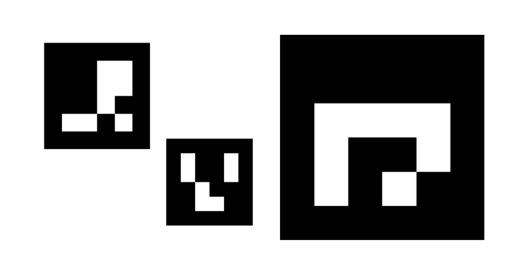

In [38]:
output_1 = test_1.copy()
output_1 = cv2.aruco.drawDetectedMarkers(output_1, markerCorners, markerIds)

cv2_imshow(output_1)